In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
train_df = pd.read_csv(filepath_or_buffer='/content/Train.csv')
test_df = pd.read_csv(filepath_or_buffer='/content/Test.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train_df.shape

(8523, 12)

In [ ]:
test_df.shape

(5681, 11)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**Data has missing values for 2 columns ['Item_Weight','Outlet_Size']**

In [ ]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train_df.skew(numeric_only=True)

,0
Item_Weight,0.082426
Item_Visibility,1.167091
Item_MRP,0.127202
Outlet_Establishment_Year,-0.396641
Item_Outlet_Sales,1.177531


In [ ]:
train_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
train_df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
train_df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
train_df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
train_df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


# **Data** **Preparation**

In [ ]:
current_year = datetime.datetime.now().year
print(current_year)

2025


In [ ]:
def data_prep(train):
  train['Item_Weight'] = np.where(train['Item_Weight'].isna(),train['Item_Weight'].median(skipna=True),train['Item_Weight'])
  train['Outlet_Size'] = np.where(train['Outlet_Size'].isnull(),train['Outlet_Size'].mode(),train['Outlet_Size'])
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(to_replace='LF', value='Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(to_replace='low fat', value='Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(to_replace='reg', value='Regular')
  train['Years_Of_Business'] = current_year - train['Outlet_Establishment_Year']
  return train

In [ ]:
data_prep(train_df)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Of_Business
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,27
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,38
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,23
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,21
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,16


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Years_Of_Business          8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [ ]:
train_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


# **Bi-Variate Analysis**

In [ ]:
train_df.corr(numeric_only=True)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Of_Business
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693,-0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625,0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000,0.049135
Years_Of_Business,-0.007739,0.074834,-0.005020,-1.000000,0.049135,1.000000


<Axes: >

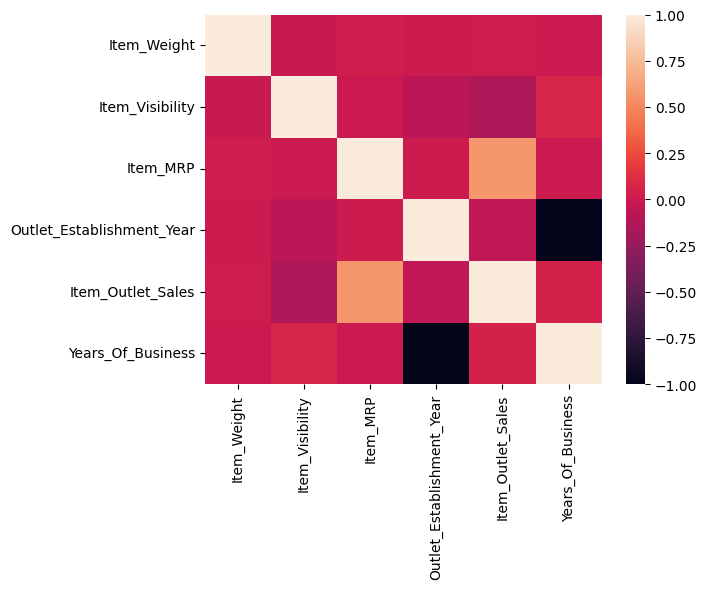

In [ ]:
sns.heatmap(train_df.corr(numeric_only=True))

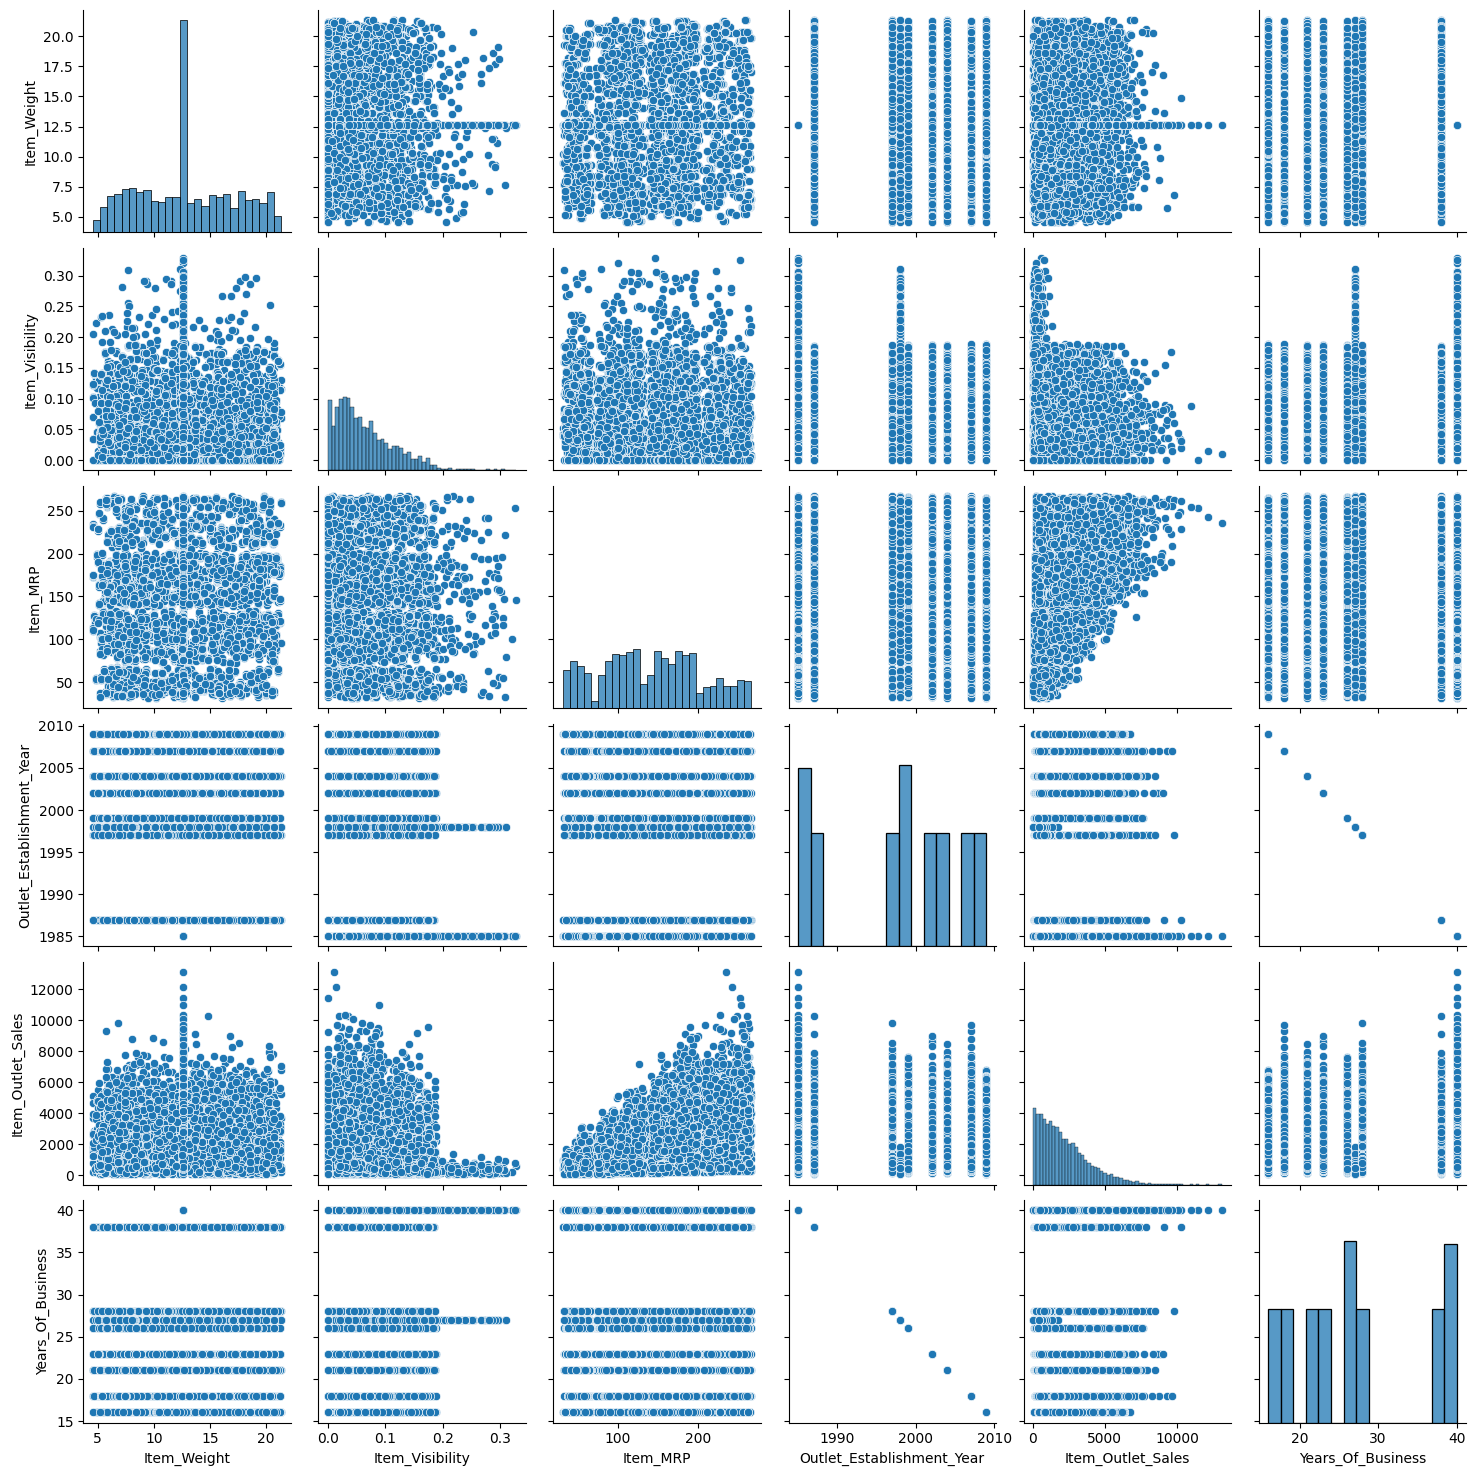

In [ ]:
sns.pairplot(train_df)

In [ ]:
train_df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,5203
Small,2388
High,932


In [ ]:
pd.crosstab(train_df['Outlet_Location_Type'],train_df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


In [ ]:
from scipy.stats import chi2_contingency
def chi_sq(var1,var2):
  data = pd.crosstab(var1,var2)
  _,p,_,_ = chi2_contingency(data)
  if p < 0.05:
    print(f'The relationship is strong')
  else:
    print(f'The relationship is weak')
  return data

In [ ]:
train_df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,5203
Small,2388
High,932


In [ ]:
train_df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
chi_sq(train_df['Outlet_Location_Type'],train_df['Outlet_Size'])

The relationship is strong


Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,1855,930
Tier 3,932,2418,0


In [ ]:
chi_sq(train_df['Outlet_Size'],train_df['Outlet_Location_Type'])

The relationship is strong


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [ ]:
chi_sq(train_df['Outlet_Type'],train_df['Outlet_Location_Type'])

The relationship is strong


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


# Data Preparation for Modeling/Multi-Variate Analysis

In [ ]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Of_Business'],
      dtype='object')

In [ ]:
train_df.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [ ]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_Of_Business'],
      dtype='object')

In [ ]:
x = train_df.drop(['Item_Outlet_Sales'],axis=1)
y = train_df['Item_Outlet_Sales']

In [ ]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Of_Business
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,26
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,16
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,26
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,27
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,38


In [ ]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [ ]:
x.shape

(8523, 9)

In [ ]:
y.shape

(8523,)

## Encoding Object Variables

In [ ]:
le = LabelEncoder()

In [ ]:
train_df['Item_Fat_Content'].dtype

dtype('O')

In [ ]:
for i in x.columns:
  if x[i].dtype == 'object':
    x[i] = le.fit_transform(x[i])

In [ ]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Of_Business
0,9.30,0,0.016047,4,249.8092,1,0,1,26
1,5.92,1,0.019278,14,48.2692,1,2,2,16
2,17.50,0,0.016760,10,141.6180,1,0,1,26
3,19.20,1,0.000000,6,182.0950,1,2,0,27
4,8.93,0,0.000000,9,53.8614,0,2,1,38


In [ ]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


# Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 9)
(1705, 9)
(6818,)
(1705,)


# Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_train_lr = lr.predict(x_train)
pred_test_lr = lr.predict(x_test)

In [ ]:
lr.intercept_

np.float64(-243.04469876652684)

In [ ]:
lr.coef_

array([-1.13726234e-01,  5.84239364e+01, -1.40185422e+03, -2.84093096e+00,
        1.57264471e+01, -3.30133181e+02, -4.17412800e+02,  9.93463276e+02,
       -1.25046840e+00])

# Model Accuracy

## Train Accuracy

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train_lr))
r_sq_train = r2_score(y_train, pred_train_lr)

## Test Accuracy

In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test_lr))
r_sq_test = r2_score(y_test, pred_test_lr)

In [ ]:
print(f"RMSE for train data: {round(rmse_train,2)}")
print(f"RMSE for test data: {round(rmse_test,2)}")

print(f"R-Squared for train data: {round(r_sq_train,2)}")
print(f"R-Squared for test data: {round(r_sq_test,2)}")

RMSE for train data: 1202.95
RMSE for test data: 1173.02
R-Squared for train data: 0.51
R-Squared for test data: 0.52


In [ ]:
from sklearn.preprocessing import FunctionTransformer

IV_log_scaled = train_df[['Item_Visibility']]
log_scaler = FunctionTransformer(np.log1p, validate=True)
IV_scaled = log_scaler.fit_transform(IV_log_scaled)

In [ ]:
from scipy.stats import skew
skew_value = skew(IV_scaled)
print(f"Skewness: {skew_value}")

Skewness: [1.01515537]


In [ ]:
data_prep(test_df)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Of_Business
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,26
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,18
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,27
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,18
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,40
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,28
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,16
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,23
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,18


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Years_Of_Business          5681 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 532.7+ KB


In [ ]:
test_df.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [ ]:
test_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Of_Business
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,26
1,8.300,Regular,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,18
2,14.600,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,27
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,18
4,12.500,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,40
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,28
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,16
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,Medium,Tier 2,Supermarket Type1,23
5679,15.300,Regular,0.000000,Canned,214.6218,Medium,Tier 2,Supermarket Type1,18


In [ ]:
for i in test_df.columns:
  if test_df[i].dtype == 'object':
    test_df[i] = le.fit_transform(test_df[i])

In [ ]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Of_Business
0,20.750,0,0.007565,13,107.8622,1,0,1,26
1,8.300,1,0.038428,4,87.3198,1,1,1,18
2,14.600,0,0.099575,11,241.7538,1,2,0,27
3,7.315,0,0.015388,13,155.0340,1,1,1,18
4,12.500,1,0.118599,4,234.2300,1,2,3,40


In [ ]:
Item_Outlet_Sales_Test = lr.predict(test_df)

In [ ]:
Item_Outlet_Sales_Test

array([2034.16568005, 1345.84066338, 2187.66206892, ..., 1714.59202286,
       3403.76367894, 1131.03775394])

In [ ]:
submission = pd.read_csv(filepath_or_buffer='/content/sample_submission_8RXa3c6.csv')

In [ ]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [ ]:
submission['Item_Outlet_Sales'] = Item_Outlet_Sales_Test

In [ ]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2034.165680
1,FDW14,OUT017,1345.840663
2,NCN55,OUT010,2187.662069
3,FDQ58,OUT017,2359.161870
4,FDY38,OUT027,5085.353001


In [ ]:
submission.to_csv('final_submission.csv',index=False)